# Learning to Use Scrapy: Programming Historian Lesson

### ## Why would a Digital Humanities researcher need to know Scrapy? As a leading free tool for crawling a website, or fully accessing all data on a page in order to study it, historical archiving becomes easier. When it comes to websites that may have important data that can be crawled with this tool, using Scrapy allows for a quicker and potentially more accurate scraping of data. 

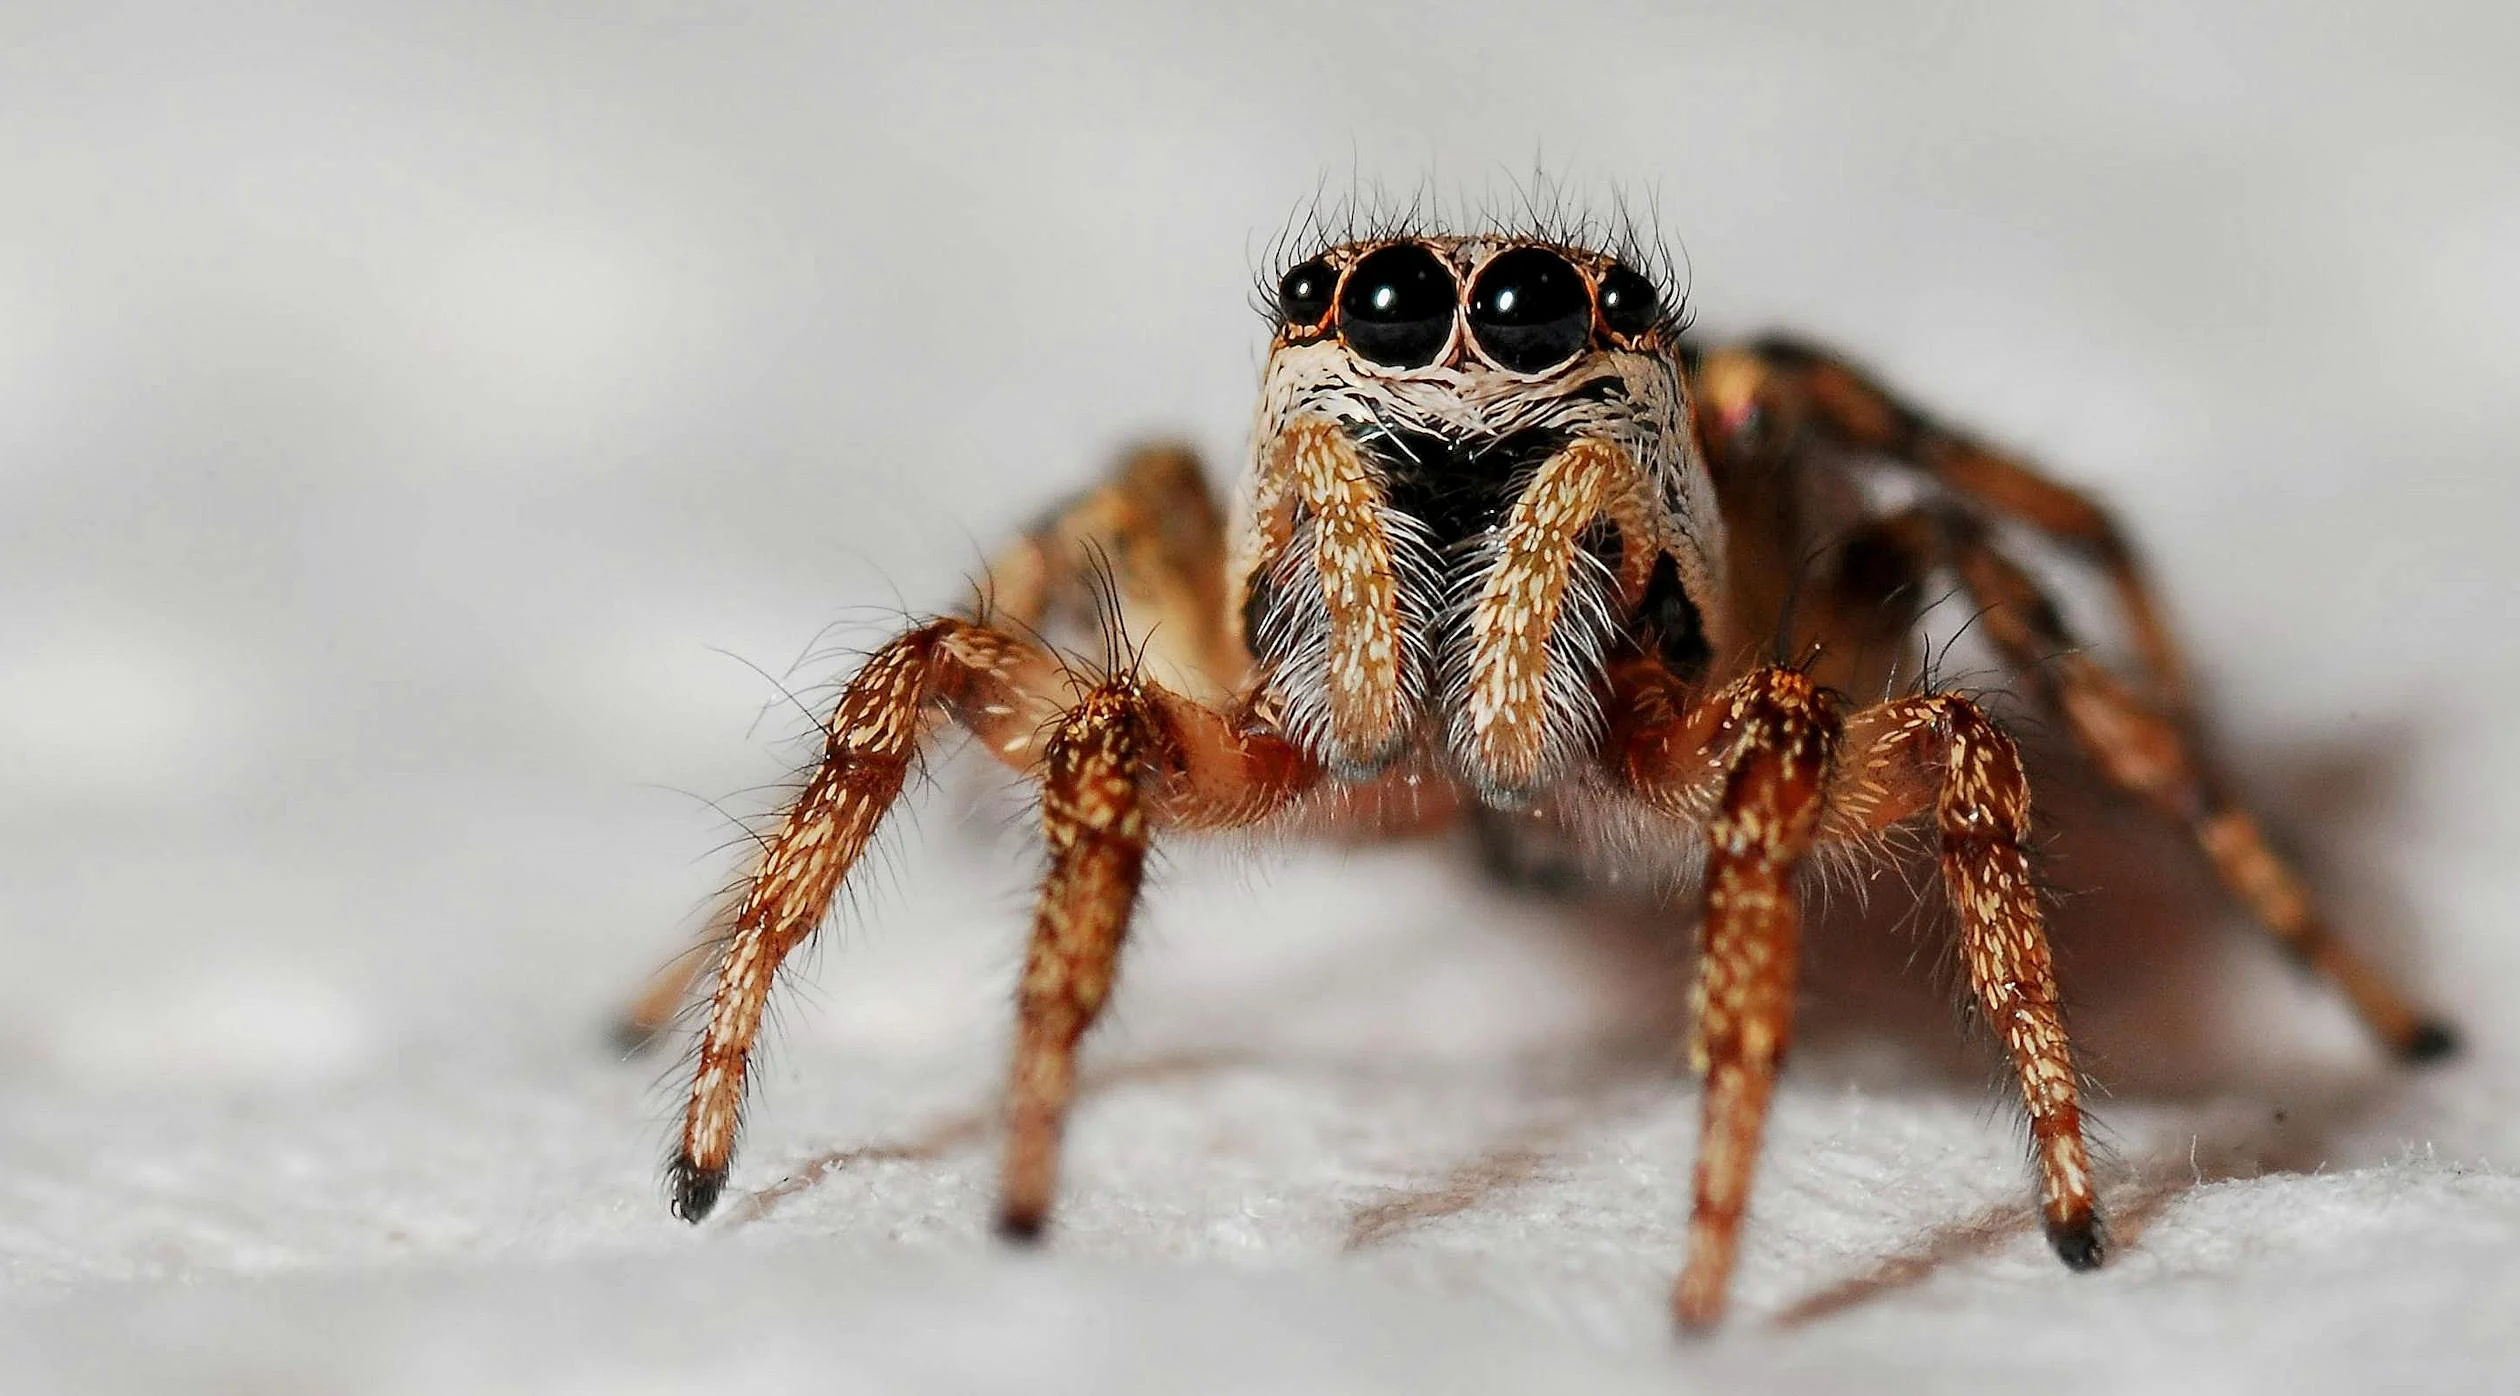
###### We will be using Scrapy's spider metaphor language to demonstrate the tool's uses. 

**The inspiration from the lesson comes from Scrapy's own tutorial website packed with helpful hints and line-by-line coding examples: **[Find the website here](https://docs.scrapy.org/en/latest/intro/tutorial.html)

## Step 1: Installing Scrapy on your System

First, we will make sure that our system has Scrapy installed. In this instance, we can use the pip function:

Note that after doing this, go to the main directory and paste in **scrapy startproject tutorial** to get the right files in order before we make a spider.

In [4]:
pip install Scrapy

Note: you may need to restart the kernel to use updated packages.


### Success! Now it's on to step 2...

## Step 2: Let's choose a website to scrape!

Before we start exploring what Spacy has to offer us, we need consider an easy-to-scrape website to explore the tool without getting too confused. Thankfully, the Scrapy tutorial page offers us [this](https://quotes.toscrape.com/) website of quotes to scrape so we can use that as our example. After we learn how to use Scrapy, we can choose websites in line with our DH projects, such as museum archives, city records, etc. Let's move on to creating our first spider. 


## Step 3: Creating a Spider
What is a "spider" in this context? According to [geeksforgeeks](https://www.geeksforgeeks.org/scrapy-spiders/), a spider is a specific type of bot that can help index websites and their contents quickly. When it comes to creating a spider in Scrapy, we can first import the right paths then create a class of quotes the spider is scraping for, define where we are searching for this data, then make a for loop instructing what the spider must do in specific circumstances. Thanks to Scrapy's [tutorial](https://docs.scrapy.org/en/latest/intro/tutorial.html), we can follow and run the below code to get started. 

In [5]:
from pathlib import Path

import scrapy


class QuotesSpider(scrapy.Spider):
    name = "quotes"

    def start_requests(self):
        urls = [
            "https://quotes.toscrape.com/page/1/",
            "https://quotes.toscrape.com/page/2/",
        ]
        for url in urls:
            yield scrapy.Request(url=url, callback=self.parse)

    def parse(self, response):
        page = response.url.split("/")[-2]
        filename = f"quotes-{page}.html"
        Path(filename).write_bytes(response.body)
        self.log(f"Saved file {filename}")

## Step 4: Make the Spider Crawl!
So now we have a spider made to scrape our website of choice, and can define each name and section as we see fit. Let's get started and explore what this spider can do. 